# Final Project: Music Genre Clustering

In [1]:
import numpy as np
import scipy

import os

import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import librosa.display
from pyAudioAnalysis import MidTermFeatures
from pyAudioAnalysis import audioBasicIO
from IPython.display import Audio

from sklearn.manifold import Isomap

%matplotlib inline

Please do a clustering analysis on the provided sound tracks. You may use any methods for feature engineering, but the clustering methods should be limited to the methods discussed in this class. Do not hand label the tracks (it will be considered as cheating).

In [2]:
file_list = os.listdir(os.getcwd()+'/data')

audio_list = []

for file in file_list[0:90]:
    y, sr = librosa.load(os.path.join(os.getcwd()+'/data/'+file))
    audio_list.append(y)

C:\Dev\anaconda\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
C:\Dev\anaconda\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [3]:
Audio(data=audio_list[0], rate=sr)

In [2]:
features,songs,feature_names=MidTermFeatures.directory_feature_extraction("./data/", 
                                                                          mid_window=1, 
                                                                          mid_step=1,
                                                                          short_window=0.1, 
                                                                          short_step=0.05)

Analyzing file 1 of 90: ./data\0.mp3
Analyzing file 2 of 90: ./data\1.mp3
Analyzing file 3 of 90: ./data\10.mp3
Analyzing file 4 of 90: ./data\11.mp3
Analyzing file 5 of 90: ./data\12.mp3
Analyzing file 6 of 90: ./data\13.mp3
Analyzing file 7 of 90: ./data\14.mp3
Analyzing file 8 of 90: ./data\15.mp3
Analyzing file 9 of 90: ./data\16.mp3
Analyzing file 10 of 90: ./data\17.mp3
Analyzing file 11 of 90: ./data\18.mp3
Analyzing file 12 of 90: ./data\19.mp3
Analyzing file 13 of 90: ./data\2.mp3
Analyzing file 14 of 90: ./data\20.mp3
Analyzing file 15 of 90: ./data\21.mp3
Analyzing file 16 of 90: ./data\22.mp3
Analyzing file 17 of 90: ./data\23.mp3
Analyzing file 18 of 90: ./data\24.mp3
Analyzing file 19 of 90: ./data\25.mp3
Analyzing file 20 of 90: ./data\26.mp3
Analyzing file 21 of 90: ./data\27.mp3
Analyzing file 22 of 90: ./data\28.mp3
Analyzing file 23 of 90: ./data\29.mp3
Analyzing file 24 of 90: ./data\3.mp3
Analyzing file 25 of 90: ./data\30.mp3
Analyzing file 26 of 90: ./data\31.mp3

In [3]:
np.save("featues.npy", features)

In [127]:
labs = np.array([1,2,1,3,1,2,2,1,2,1,
                 2,2,2,3,3,1,3,3,3,1,
                 2,3,2,3,3,2,1,3,3,1,
                 1,2,3,2,1,1,1,1,2,3,
                 3,3,3,3,3,3,3,1,2,1,
                 1,2,3,3,1,2,1,2,1,1,
                 3,3,3,1,3,2,1,2,1,3,
                 3,3,3,1,1,1,2,1,2,3,
                 1,3,2,3,3,2,3,2,1,3])
labs

array([1, 2, 1, 3, 1, 2, 2, 1, 2, 1, 2, 2, 2, 3, 3, 1, 3, 3, 3, 1, 2, 3,
       2, 3, 3, 2, 1, 3, 3, 1, 1, 2, 3, 2, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 1, 2, 1, 1, 3, 3, 3, 1, 3, 2,
       1, 2, 1, 3, 3, 3, 3, 1, 1, 1, 2, 1, 2, 3, 1, 3, 2, 3, 3, 2, 3, 2,
       1, 3])

In [126]:
Audio(data=audio_list[87], rate=sr)

In [7]:
features.shape

(90, 138)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)

### LLE + Kmeans

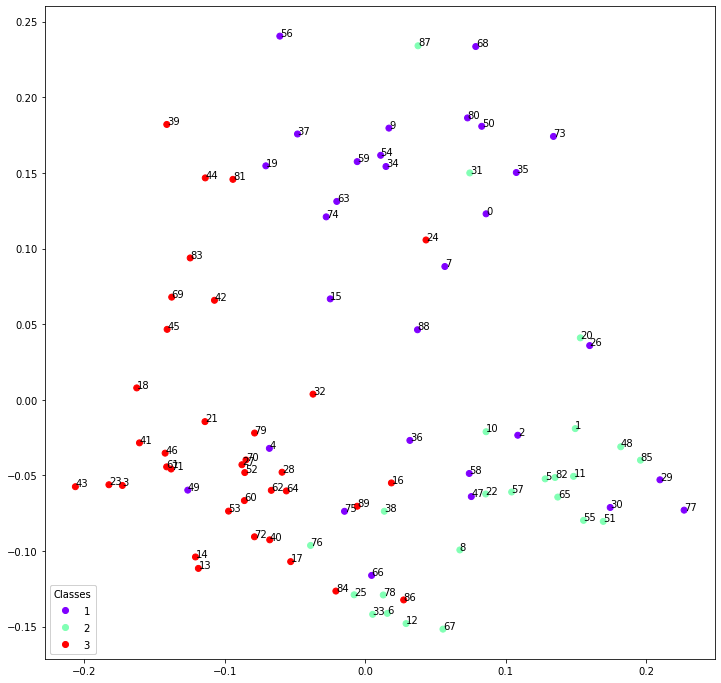

In [128]:
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=17, method='standard',random_state=0)
x_new = embedding.fit_transform(scaled_features)

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

for i in range(90):
    ax.annotate(i, (x_new[i,0],x_new[i,1]))

In [129]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters=3,random_state=0).fit(x_new)
clust_labs=clustering.labels_

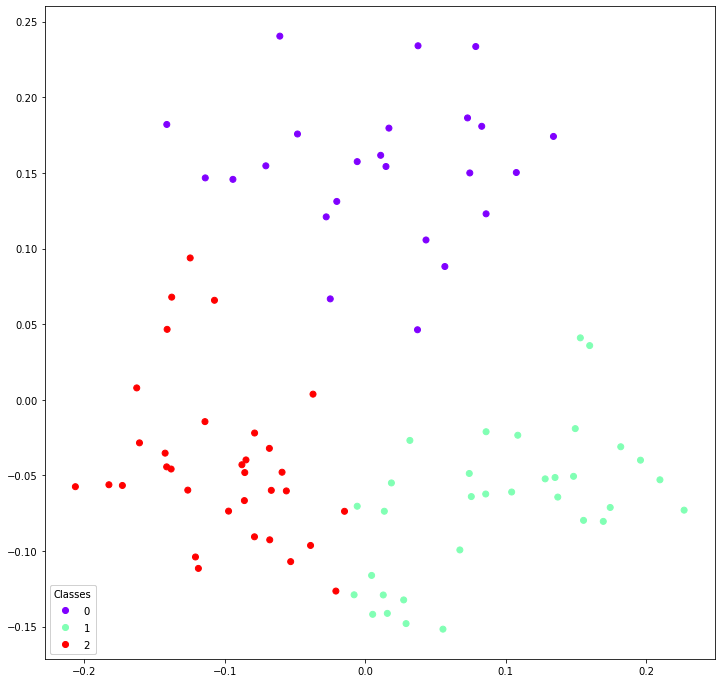

In [130]:
fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=clust_labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [131]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(clust_labs, labs)

0.41774577975620436

### Standardized

In [132]:
from sklearn.preprocessing import StandardScaler, normalize 

normalized_features = normalize(scaled_features)

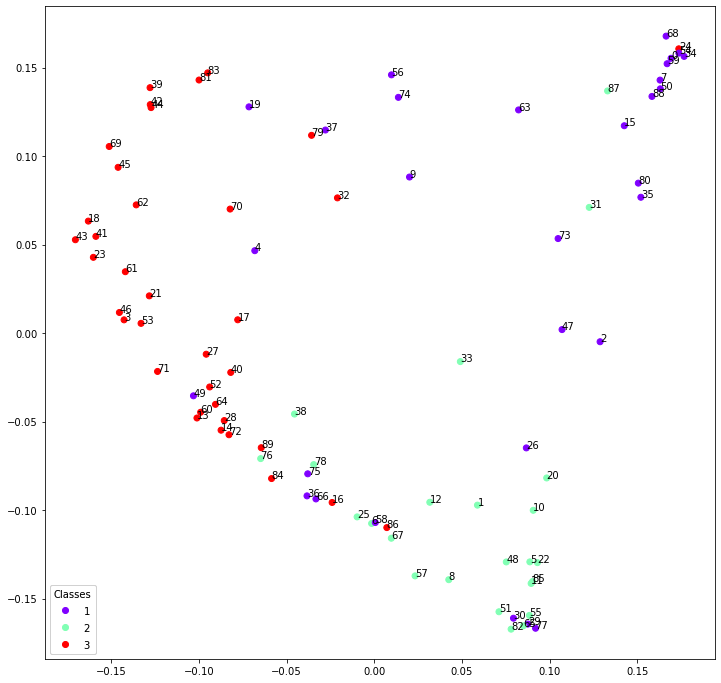

In [133]:
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=5, method='standard',random_state=0)
x_new = embedding.fit_transform(normalized_features)

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

for i in range(90):
    ax.annotate(i, (x_new[i,0],x_new[i,1]))

In [134]:
clustering = KMeans(n_clusters=3,random_state=0).fit(x_new)
clust_labs = clustering.labels_

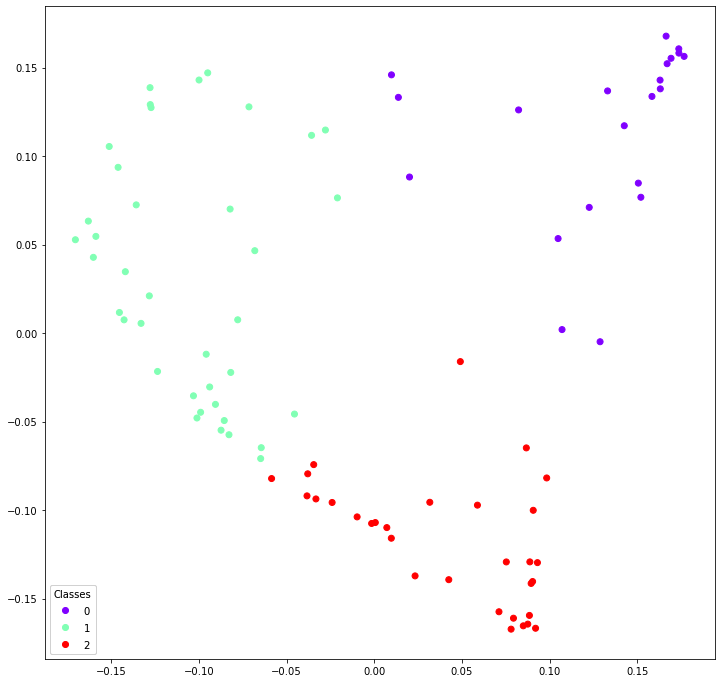

In [135]:
fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=clust_labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [136]:
adjusted_rand_score(clust_labs, labs)

0.4638695076134321

### Spectral Clustering

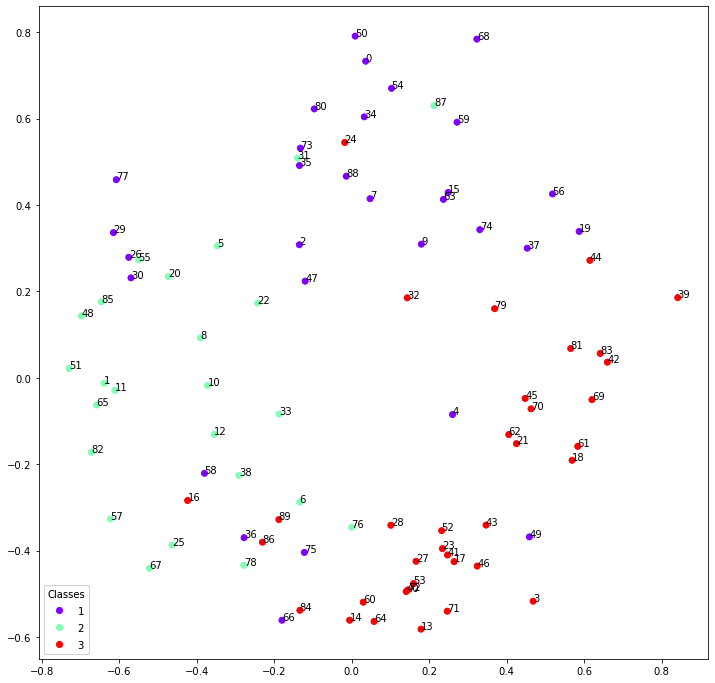

In [137]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2)
x_new = pca.fit_transform(normalized_features)

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

for i in range(90):
    ax.annotate(i, (x_new[i,0],x_new[i,1]))

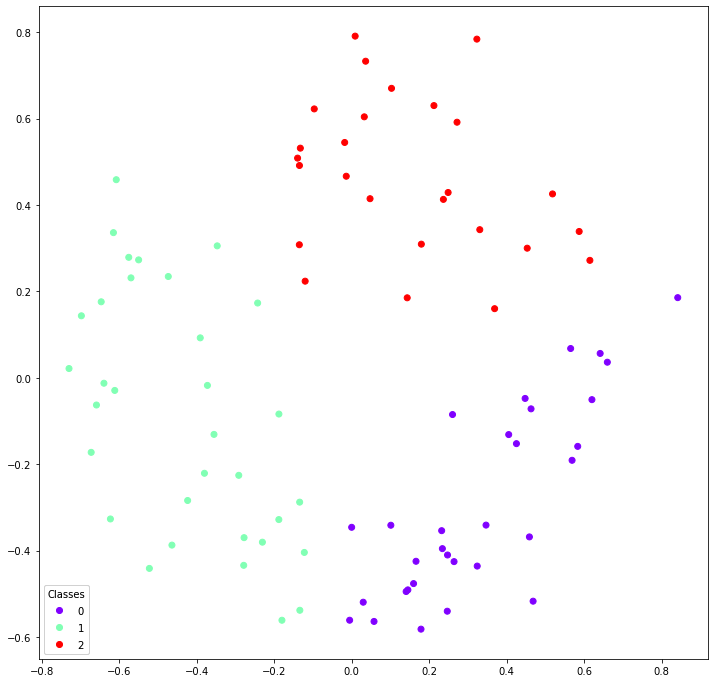

In [138]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=3,
                                random_state=0,
                                assign_labels='kmeans',
                                n_components=3,
                                affinity='nearest_neighbors',
                                n_neighbors=20).fit(normalized_features)
clust_labs=clustering.labels_

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=clust_labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [139]:
adjusted_rand_score(clust_labs, labs)

0.4263628554910809

### Using the Correlation Matrix

In [188]:
import sklearn.metrics.pairwise as pw
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN

In [189]:
pws = pw.cosine_similarity(scaled_features)

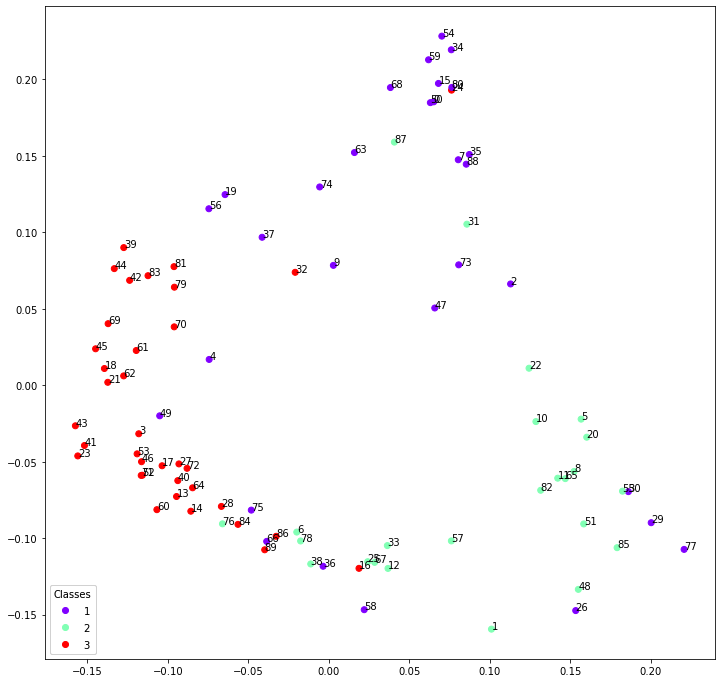

In [190]:
embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=8, method='standard',random_state=0)
x_new = embedding.fit_transform(pws)

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

for i in range(90):
    ax.annotate(i, (x_new[i,0],x_new[i,1]))

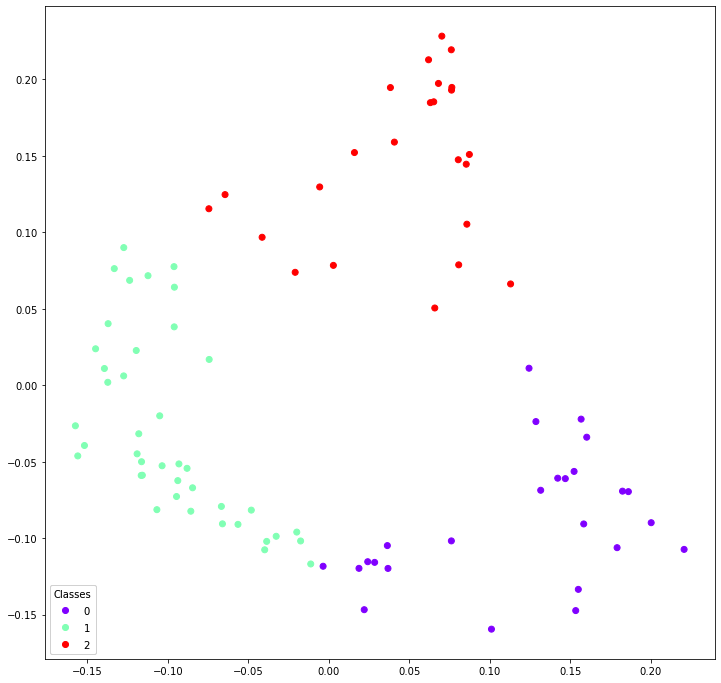

In [191]:
clustering = KMeans(n_clusters=3,random_state=0).fit(x_new)
clust_labs = clustering.labels_
fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=clust_labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [192]:
adjusted_rand_score(clust_labs, labs)

0.4800656394295455

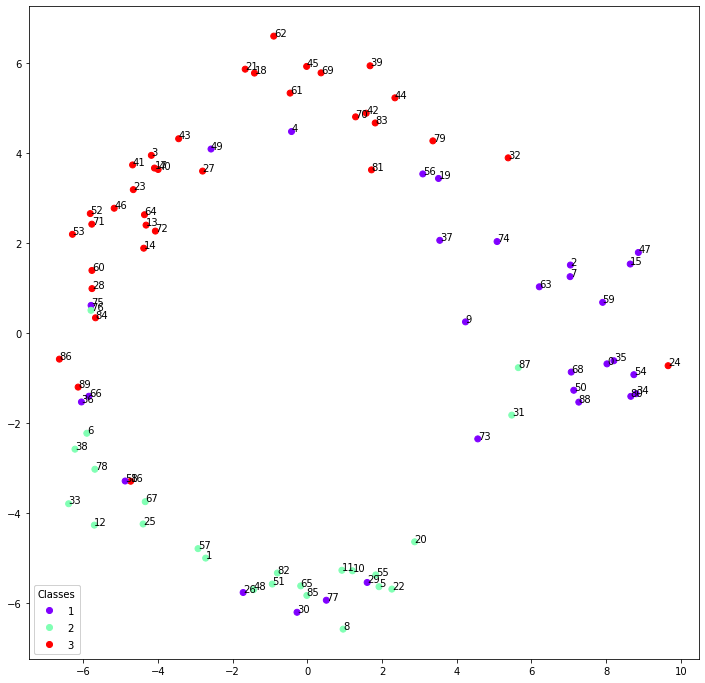

In [193]:
embedding = Isomap(n_components=2, n_neighbors=4)
x_new = embedding.fit_transform(pws)

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

for i in range(90):
    ax.annotate(i, (x_new[i,0],x_new[i,1]))

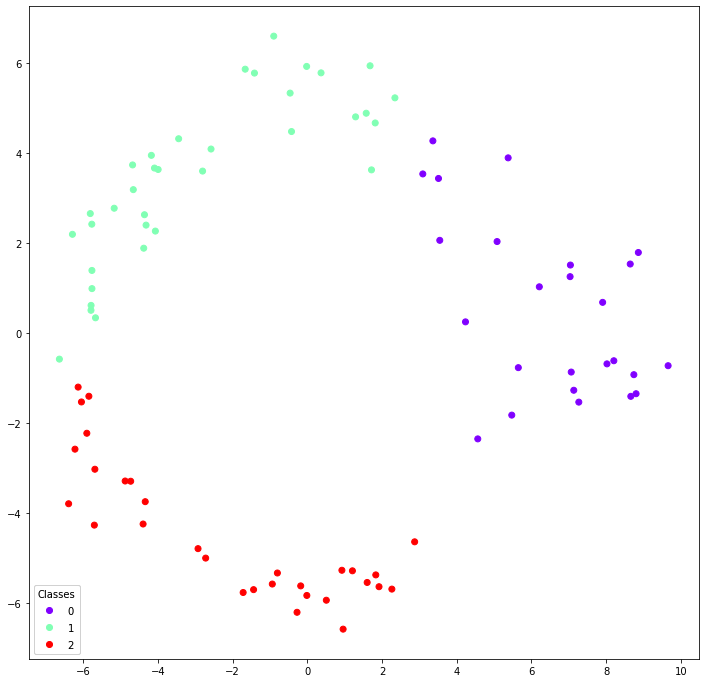

In [194]:
clustering = KMeans(n_clusters=3,random_state=0).fit(x_new)
clust_labs = clustering.labels_
fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=clust_labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [195]:
adjusted_rand_score(clust_labs, labs)

0.5040296369224556

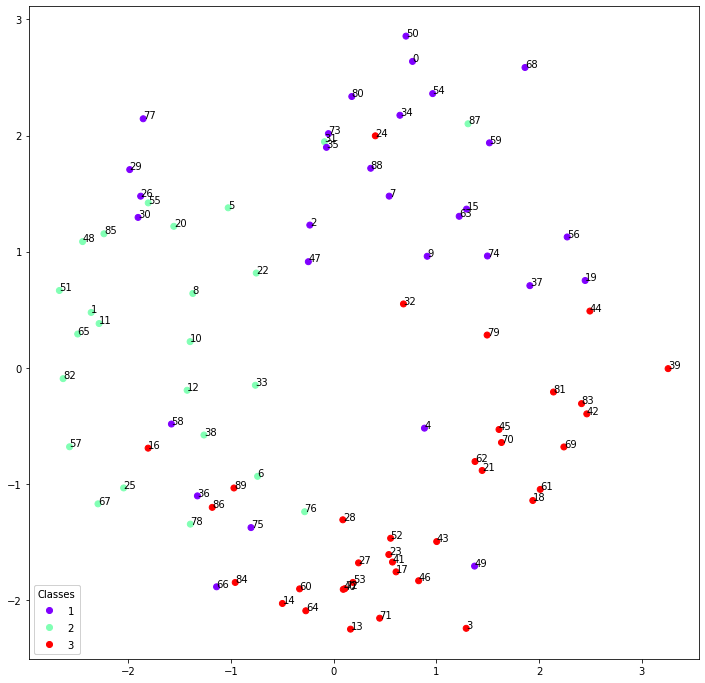

In [201]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2)
x_new = pca.fit_transform(pws)

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

for i in range(90):
    ax.annotate(i, (x_new[i,0],x_new[i,1]))

C:\Dev\anaconda\lib\site-packages\sklearn\cluster\_spectral.py:484: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


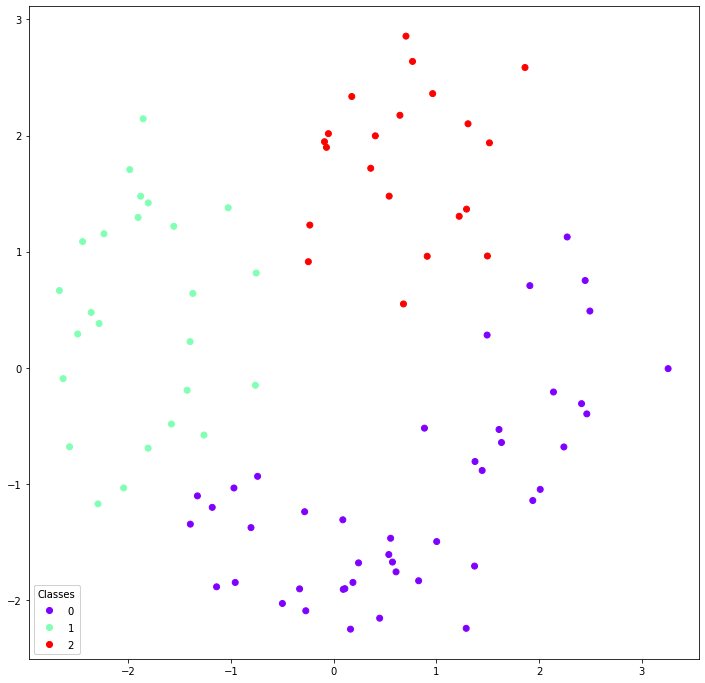

In [225]:
clustering = SpectralClustering(n_clusters=3,
                                random_state=0,
                                assign_labels='kmeans',
                                n_components=3,
                                affinity='rbf',
                                gamma=1).fit(pws)
clust_labs=clustering.labels_

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=clust_labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [226]:
adjusted_rand_score(clust_labs, labs)

0.42864067431611896

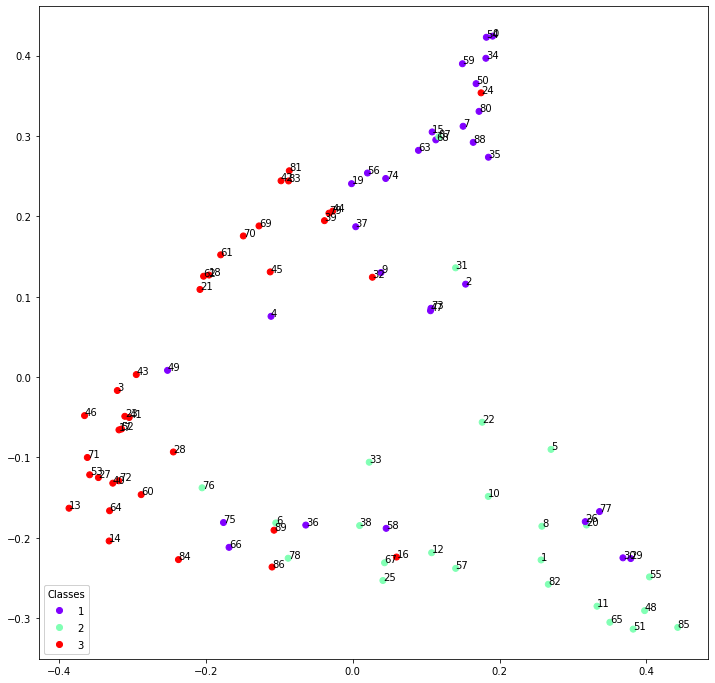

In [254]:
from sklearn.decomposition import KernelPCA 

pca = KernelPCA(n_components=2, kernel='rbf',gamma=0.5)
x_new = pca.fit_transform(pws)

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

for i in range(90):
    ax.annotate(i, (x_new[i,0],x_new[i,1]))

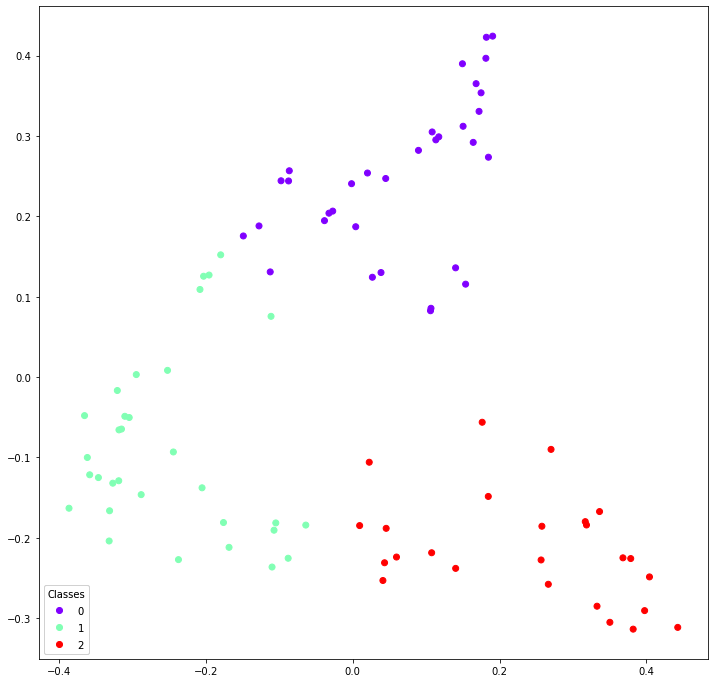

In [257]:
clustering = KMeans(n_clusters=3,random_state=0).fit(x_new)
clust_labs = clustering.labels_
fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=clust_labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [258]:
adjusted_rand_score(clust_labs, labs)

0.30666702048212413

# Submission to leaderboard

You will get feedback of your clustering result by submitting to the leaderboard. Each team will have 10 chances. Please submit a submission log as an appendix in your final report, which should record your ari score (leadboard feedback), and your improvement plan (in bullet points, keep it concise) between two submissions.

There are two types of submissions.

### Stage Submission

Each group can submit your results up to ten times. You will only get the range of your ari scores to have a rough check of your clusters. This is by no means a supervised learning project. So your goal shouldn't be to improve this ari score. It only serves as an indicator whether you need to work harder to improve your clustering scheme.

### Final Submission

You can only run the final submission once! It is when you finished all the writing and everything is finalized. Change isFinal = 'yes' then run this cell. You must keep the succesfull message from the server when you submit your jupyter notebook. Once you made the final submission, the server will not accept any further submission of any kind.

In [ ]:
#labels = list(range(90)) 
#vsID = "10730143x"  
#URL = "https://wfirmplh0g.execute-api.us-west-1.amazonaws.com/leaderboard/ari"
#isFinal = 'no'

# 1. put your clustering result in labels;
#  if you have k clusters, the labels should be a vector of elements taking values
#  from 0~ k-1, there must not have a cluster with no members.
# 2. put your group ID as a string in vsID, it is unique for each group
# 3. change the URL to the URL that will be published on Canvas.
# 4. To make your final submission, change isFinal to 'yes'

### Do not change any code except the following block
### your code starts here



### your code ends here


#import requests
#import json
#submission = {}
#submission['vsID'] = vsID
#submission['labels'] = ",".join( [ str( int(x)) for x in labels   ])
#submission['isFinal'] = isFinal
#r = requests.get(url = URL, params = submission)

#print(r.json()['body'])

# <font color= "blue"> Submission Instructions</font>

1. Change the isFinal variable to be 'yes' in the submission to leaderboard cell, run it just once to get submission sucessful message.
2. Select File -> Download as -> PDF via LaTeX
3. Submit your PDF on Gradescope. There should be three different parts to submit on gradescope, the report pdf file, jupyter notebook pdf file and the methodology pdf file.
4. Pack all the relevant files (you can save your features in a different file, feature.csv) into a zipfile yourGroupNumber.zip (group1.zip for example) and upload it to Canvas.